In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [4]:
def accuracy_report(y_true, y_pred, make_plot=True):
    print('MSE: {:.3f}'.format(mse(y_true, y_pred)))
    print('RMSE: {:.3f}'.format(np.sqrt(mse(y_true, y_pred))))
    print('MAE: {:.3f}'.format(mae(y_true, y_pred)))
    if make_plot:
        plt.figure(figsize=(8,6))
        plt.scatter(y_true, y_pred)
        plt.xlabel('Reality')
        plt.ylabel('Prediction')
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')

In [5]:
sns.set(rc={'figure.figsize':(10,8)})

df = pd.read_csv("/home/lenarsaitov/PycharmProjects/python-parser-cian/data.csv")
df["Price_per_meters"] = df["Price_per_month"]/(df["Square_meters"].astype(float))

df.head().T

,0,1,2,3,4
Link,https://kazan.cian.ru/rent/flat/243318735/,https://kazan.cian.ru/rent/flat/244424052/,https://kazan.cian.ru/rent/flat/237818882/,https://kazan.cian.ru/rent/flat/236848944/,https://kazan.cian.ru/rent/flat/243010354/
District,Vahitovskij,Novo-Savinovskij,Novo-Savinovskij,Vahitovskij,Vahitovskij
Price_per_month,30000,30000,100000,50000,130000
Commissions %,50,50,50,50,50
kitchen_meters,15,13,22,18,18
How_many_rooms,2,2,4,3,4
Floor,5,12,9,5,9
Square_meters,75,62,186,110,220
Street,Dostoevskogo,Sibgata Hakima,Sibgata Hakima,Tovarischeskaja,Tolstogo
Author,ID 305100,ID 305100,ID 305100,ID 305100,ID 305100


Исключим некоторые данные

In [6]:
df = df.drop(["Link", 'Street', 'Commissions %', 'Price_per_month'], axis = 1)
df.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,Author,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,ID 305100,12,2008,75,400.000000
1,Novo-Savinovskij,13,2,12,62,ID 305100,18,-1,62,483.870968
2,Novo-Savinovskij,22,4,9,186,ID 305100,16,2011,186,537.634409
3,Vahitovskij,18,3,5,110,ID 305100,9,2006,110,454.545455
4,Vahitovskij,18,4,9,220,ID 305100,12,-1,220,590.909091


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              812 non-null    object 
 1   kitchen_meters        812 non-null    int64  
 2   How_many_rooms        812 non-null    int64  
 3   Floor                 812 non-null    int64  
 4   Square_meters         812 non-null    int64  
 5   Author                812 non-null    object 
 6   All_floors            812 non-null    int64  
 7   Year_of_construction  812 non-null    int64  
 8   Living_area           812 non-null    int64  
 9   Price_per_meters      812 non-null    float64
dtypes: float64(1), int64(7), object(2)
memory usage: 63.6+ KB


### Распределение авторов по количеству объявлений

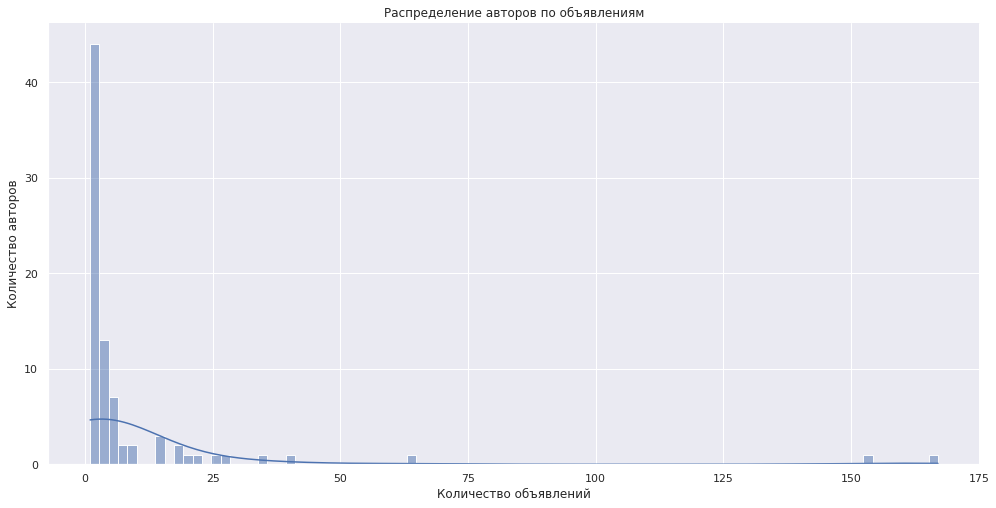

In [8]:
sns.displot(df["Author"].value_counts(), kde = True, height = 7, aspect = 2);
plt.title("Распределение авторов по объявлениям");
plt.xlabel("Количество объявлений");
plt.ylabel("Количество авторов");

In [9]:
df["Author"].value_counts().head(10)

Tretij Rim           167
Julija Bil'danova    153
HAWAII                64
Denis Gubko           41
Dmitrij Mokeev        35
ID 12865930           28
ID 16138475           26
Las Vegas             22
Poisk                 20
Marat Burganov        19
Name: Author, dtype: int64

### Количество авторов, имеющих по 1, 2, 3, 4, 5-10, 11-20, 21-40 и больше 40 объявлений

In [10]:
def level_count(count_of_offers):
    if count_of_offers <= 4:
        return count_of_offers
    elif count_of_offers <= 10:
        return 5
    elif count_of_offers <= 20:
        return 6
    elif count_of_offers <= 40:
        return 7
    else:
        return 8

In [11]:
data_count_offers = df['Author'].value_counts().apply(level_count)

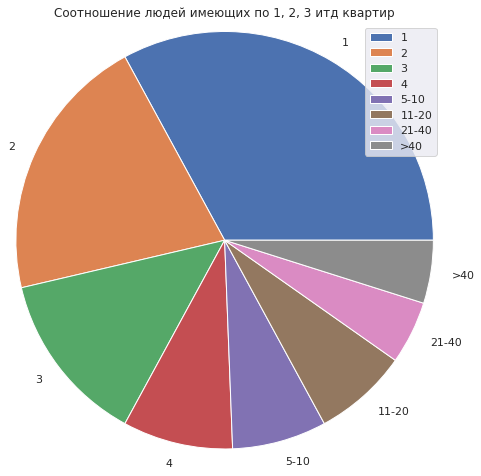

In [12]:
labels = ['1','2','3','4','5-10','11-20','21-40','>40'];
plt.pie(data_count_offers.value_counts(), labels = labels, radius=1.2);
plt.title("Соотношение людей имеющих по 1, 2, 3 итд квартир");
plt.legend();

### В каких районах больше всего объявлений

In [13]:
df = df.drop('Author', axis = 1)

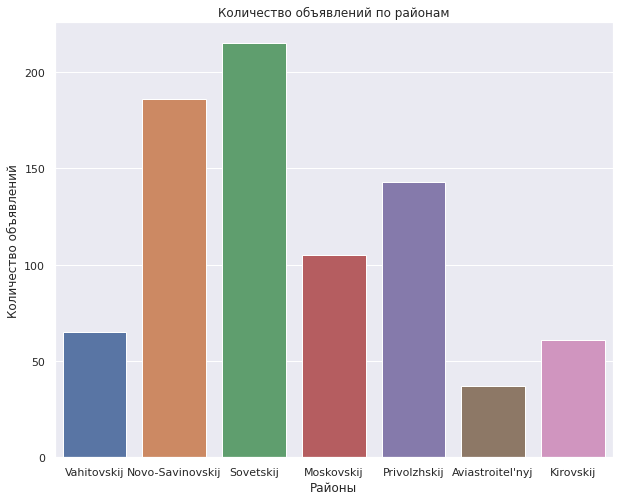

In [14]:
size_dims = (10, 8)
fig, ax = plt.subplots(figsize=size_dims);
sns.countplot(df['District'], ax = ax);
plt.title("Количество объявлений по районам");
plt.xlabel("Районы");
plt.ylabel("Количество объявлений");

### Структура цен аренды за кв.метр по районам

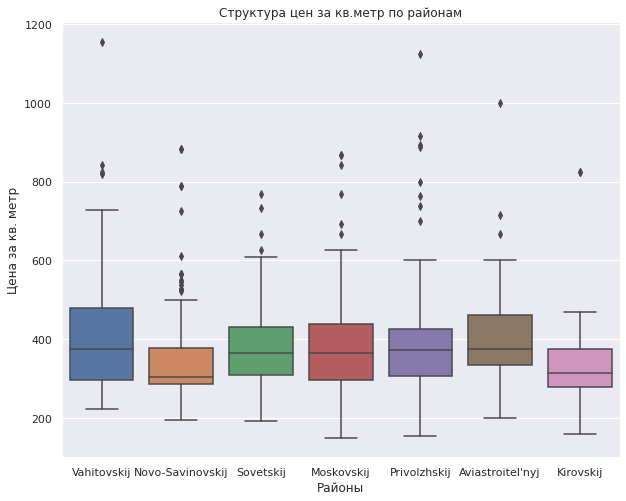

In [15]:
sns.boxplot(x = 'District', y = 'Price_per_meters', data = df);
plt.title("Структура цен за кв.метр по районам");
plt.xlabel("Районы");
plt.ylabel("Цена за кв. метр");

Видим, что почти во всех районах наблюдаются выбросы в большую сторону

### Распределение цен аренды за квадратный метр в среднем по Казани

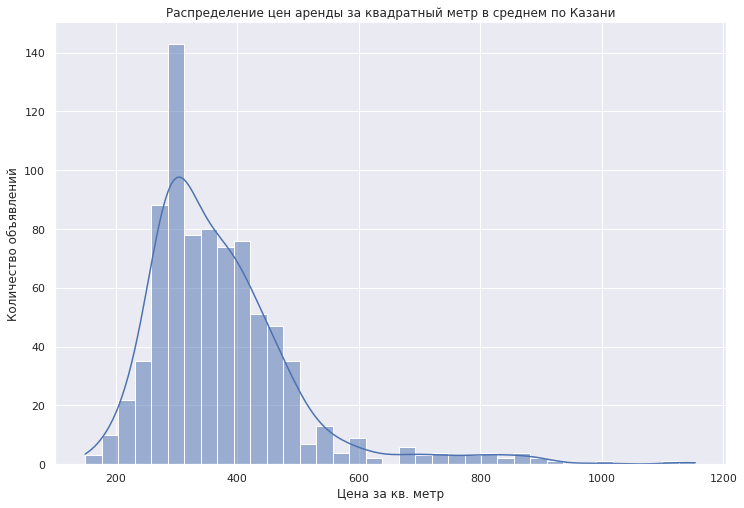

In [16]:
sns_plot = sns.displot(df['Price_per_meters'], kde = True, height = 7, aspect = 1.5)
plt.title("Распределение цен аренды за квадратный метр в среднем по Казани");
plt.xlabel("Цена за кв. метр");
plt.ylabel("Количество объявлений");

### Предобработаем данные
Уберём объявления, в которых отсутствует дата постройки здания

In [17]:
data = df.loc[df["Year_of_construction"] != -1].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 811
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              655 non-null    object 
 1   kitchen_meters        655 non-null    int64  
 2   How_many_rooms        655 non-null    int64  
 3   Floor                 655 non-null    int64  
 4   Square_meters         655 non-null    int64  
 5   All_floors            655 non-null    int64  
 6   Year_of_construction  655 non-null    int64  
 7   Living_area           655 non-null    int64  
 8   Price_per_meters      655 non-null    float64
dtypes: float64(1), int64(7), object(1)
memory usage: 51.2+ KB


### Распределение объявлений по годам постройки здания

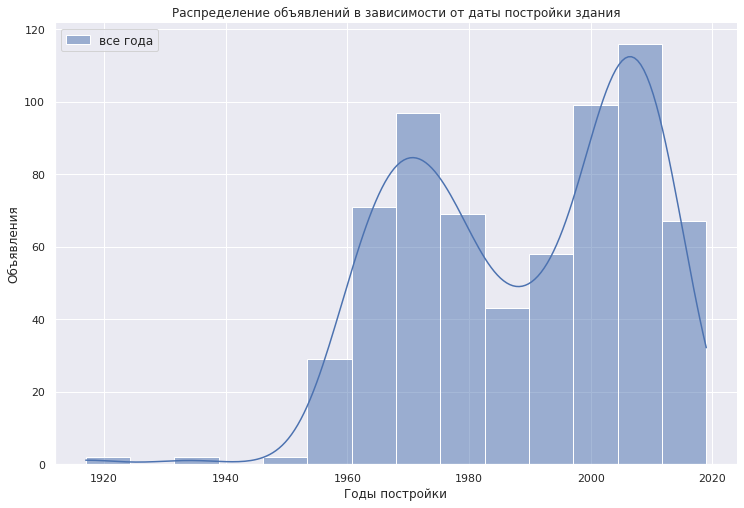

In [18]:
sns.displot(data['Year_of_construction'], label='все года', kde = True, height = 7, aspect = 1.5)

plt.legend(prop={'size': 12})
plt.title('Распределение объявлений в зависимости от даты постройки здания');
plt.xlabel('Годы постройки');
plt.ylabel('Объявления');

Видим две моды: в середине 70х и в начале 10х

### Распределение цен в трёх категориях: до 1975х, между 1975 и 2010, и после

In [19]:
def level_year(year):
    if year <= 1975:
        return 1
    elif year <= 2010:
        return 2
    else:
        return 3

In [20]:
data["Year_of_construction"].unique()

array([2008, 2011, 2006, 2014, 1963, 1962, 1981, 1977, 1971, 1967, 1959,
       1980, 2013, 1969, 2019, 1979, 2004, 2012, 2005, 1953, 1966, 2009,
       2010, 2016, 1917, 1988, 2007, 1970, 1964, 1974, 1973, 1985, 2002,
       2003, 1965, 1989, 1976, 1968, 1961, 1978, 1999, 1990, 2015, 1960,
       1932, 1991, 1998, 2001, 1986, 1957, 1994, 1995, 1992, 1997, 2000,
       1993, 1958, 1996, 1982, 1983, 1987, 1984, 1975, 1956, 1972, 1936,
       1950])

In [21]:
data["Year_category"] = data["Year_of_construction"].apply(level_year)

### Количество объявлений по категории года постройки здания

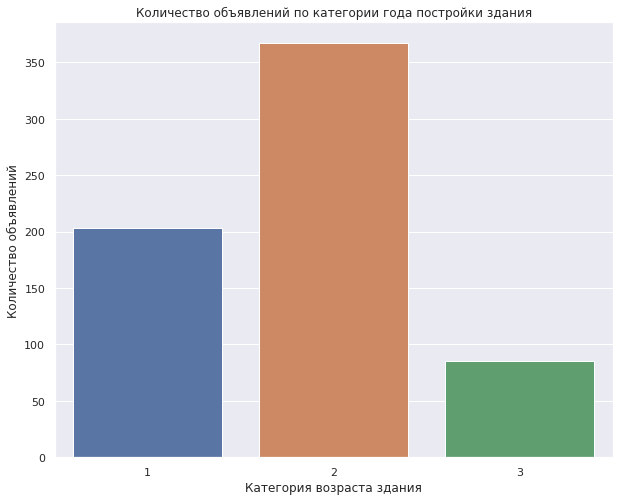

In [22]:
sns.countplot(data['Year_category']);
plt.title('Количество объявлений по категории года постройки здания');
plt.ylabel('Количество объявлений');
plt.xlabel("Категория возраста здания");

### Структура цен аренды за кв.метр в разных категориях даты постройки здания

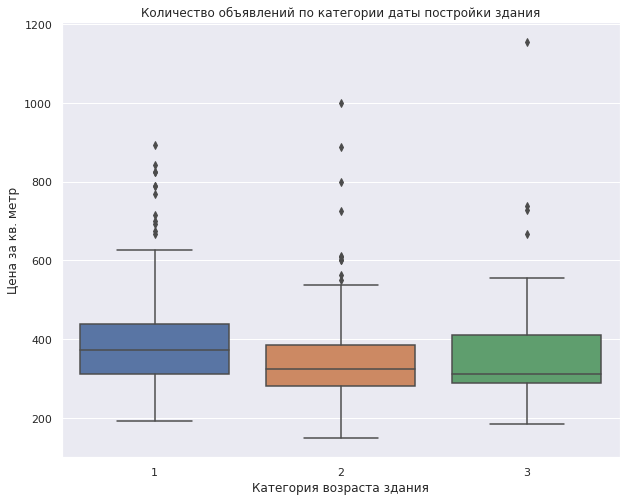

In [23]:
sns.boxplot(x = 'Year_category', y = 'Price_per_meters', data = data);
plt.title('Количество объявлений по категории даты постройки здания');
plt.ylabel('Цена за кв. метр');
plt.xlabel("Категория возраста здания");

### Средняя цена аренды квартиры за кв.метр по годам постройки здания

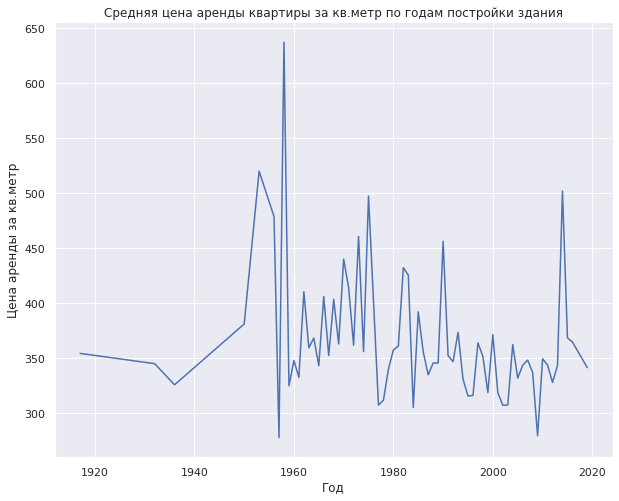

In [24]:
data.groupby('Year_of_construction').mean()['Price_per_meters'].plot();
plt.title('Средняя цена аренды квартиры за кв.метр по годам постройки здания');
plt.ylabel('Цена аренды за кв.метр');
plt.xlabel("Год");

### Средняя этажность квартиры по годам постройки здания

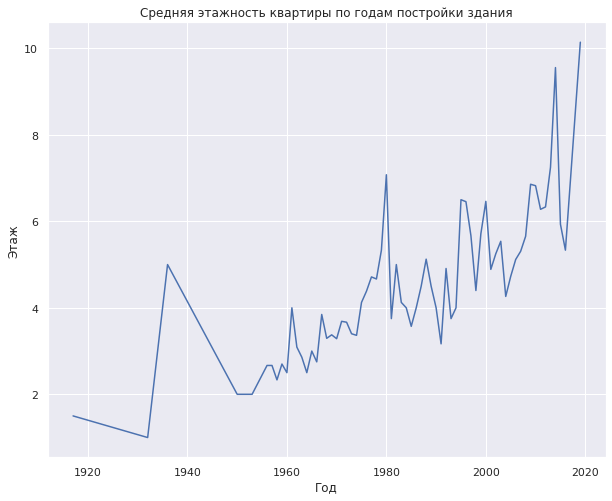

In [25]:
data.groupby('Year_of_construction').mean()['Floor'].plot();
plt.title('Средняя этажность квартиры по годам постройки здания');
plt.ylabel('Этаж');
plt.xlabel("Год");

### Распределение цен в трёх категориях: до 1975х, между 1975 и 2010, и после

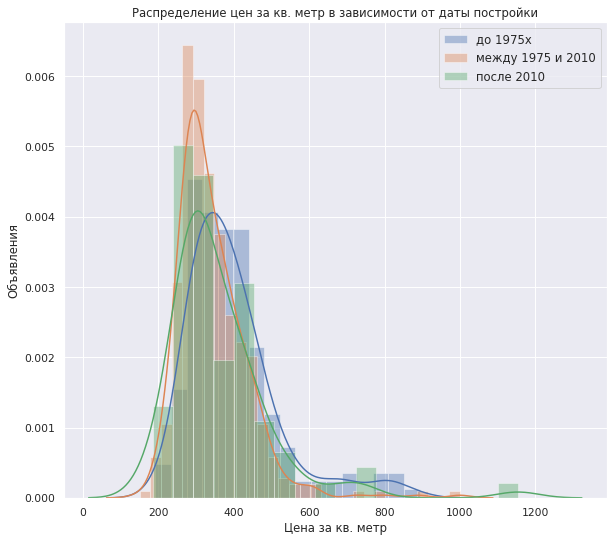

In [26]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data.query("Year_category == 1")['Price_per_meters'],  kde=True, label='до 1975х');
sns.distplot(data.query("Year_category == 2")['Price_per_meters'],  kde=True, label='между 1975 и 2010');
sns.distplot(data.query("Year_category == 3")['Price_per_meters'],  kde=True, label='после 2010');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от даты постройки');
plt.ylabel('Объявления');
plt.xlabel("Цена за кв. метр");

### Исследование данных в зависимости от района

#### 1. Вахитовский район

In [27]:
data_vahitov = df.loc[df['District'] == 'Vahitovskij'].copy()
print(f"Количество предлжений в Вахитовском районе: {len(data_vahitov)}")
print(f"Среднее значение цены за кв. метр в Вахитовском районе: {data_vahitov['Price_per_meters'].mean()}")
data_vahitov.head()

Количество предлжений в Вахитовском районе: 65
Среднее значение цены за кв. метр в Вахитовском районе: 425.12720735858784


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455
4,Vahitovskij,18,4,9,220,12,-1,220,590.909091
6,Vahitovskij,12,2,2,65,5,-1,65,461.538462
8,Vahitovskij,18,4,3,180,4,2014,180,555.555556


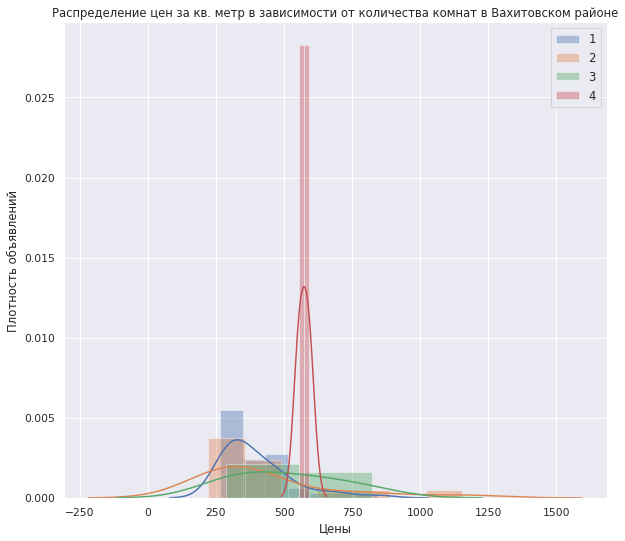

In [28]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data_vahitov.query('How_many_rooms == 1')['Price_per_meters'],  kde=True, label='1');
sns.distplot(data_vahitov.query('How_many_rooms == 2')['Price_per_meters'],  kde=True, label='2');
sns.distplot(data_vahitov.query('How_many_rooms == 3')['Price_per_meters'],  kde=True, label='3');
sns.distplot(data_vahitov.query('How_many_rooms == 4')['Price_per_meters'],  kde=True, label='4');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат в Вахитовском районе');
plt.ylabel('Плотность объявлений');
plt.xlabel('Цены');

#### Уберём квартиры с 4 комнатами для большей наглядности

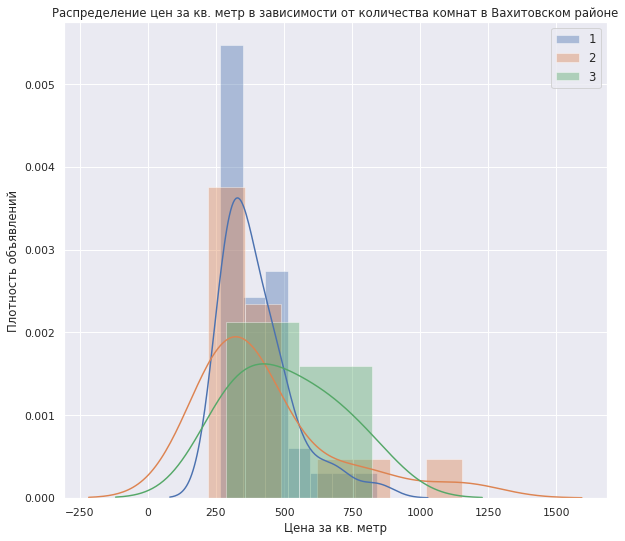

In [29]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data_vahitov.query('How_many_rooms == 1')['Price_per_meters'],  kde=True, label='1');
sns.distplot(data_vahitov.query('How_many_rooms == 2')['Price_per_meters'],  kde=True, label='2');
sns.distplot(data_vahitov.query('How_many_rooms == 3')['Price_per_meters'],  kde=True, label='3');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат в Вахитовском районе');
plt.ylabel('Плотность объявлений');
plt.xlabel("Цена за кв. метр");

#### 2. Кировский район

In [30]:
data_kirov = df.loc[df['District'] == 'Kirovskij'].copy()
print(f"Количество предлжений в Кировском районе: {len(data_kirov)}")
print(f"Среднее значение цены на метр в Кировском районе: {data_kirov['Price_per_meters'].mean()}")
data_kirov.head()

Количество предлжений в Кировском районе: 61
Среднее значение цены на метр в Кировском районе: 331.7423084199686


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
24,Kirovskij,5,1,1,35,5,1969,35,371.428571
25,Kirovskij,13,2,7,65,18,2019,65,184.615385
37,Kirovskij,-1,3,5,82,18,-1,82,158.536585
38,Kirovskij,-1,3,12,82,18,-1,82,280.487805
40,Kirovskij,-1,1,3,42,6,2016,42,428.571429


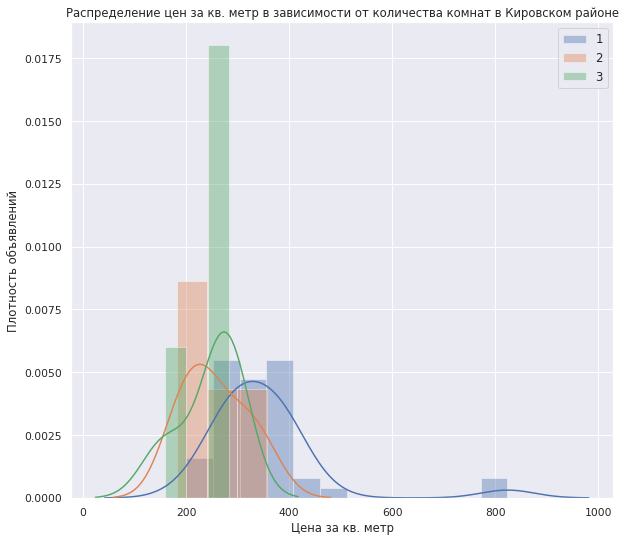

In [31]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data_kirov.query('How_many_rooms == 1')['Price_per_meters'],  kde=True, label='1');
sns.distplot(data_kirov.query('How_many_rooms == 2')['Price_per_meters'],  kde=True, label='2');
sns.distplot(data_kirov.query('How_many_rooms == 3')['Price_per_meters'],  kde=True, label='3');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат в Кировском районе');
plt.ylabel('Плотность объявлений');
plt.xlabel("Цена за кв. метр");

#### 3. Приволжский район

In [32]:
data_privol = df.loc[df['District'] == 'Privolzhskij'].copy()
print(f"Количество предлжений в Приволжском районе: {len(data_privol)}")
print(f"Среднее значение цены на метр в Приволжском районе: {data_privol['Price_per_meters'].mean()}")
data_privol.head()

Количество предлжений в Приволжском районе: 143
Среднее значение цены на метр в Приволжском районе: 391.1134839222091


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
12,Privolzhskij,8,1,4,37,9,1981,37,405.405405
17,Privolzhskij,8,1,6,35,10,-1,35,428.571429
18,Privolzhskij,10,1,13,34,19,-1,34,588.205882
19,Privolzhskij,7,1,8,37,9,1980,37,432.432432
21,Privolzhskij,10,1,6,45,10,2011,45,411.111111


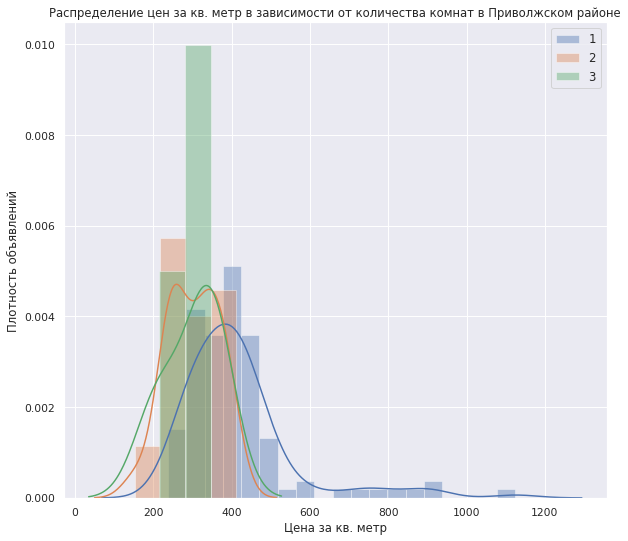

In [33]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data_privol.query('How_many_rooms == 1')['Price_per_meters'],  kde=True, label='1');
sns.distplot(data_privol.query('How_many_rooms == 2')['Price_per_meters'],  kde=True, label='2');
sns.distplot(data_privol.query('How_many_rooms == 3')['Price_per_meters'],  kde=True, label='3');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат в Приволжском районе');
plt.ylabel('Плотность объявлений');
plt.xlabel("Цена за кв. метр");

#### 4. Ново-Савиновский район

In [34]:
data_novsav = df.loc[df['District'] == 'Novo-Savinovskij'].copy()
print(f"Количество предлжений в Ново-Савиновском районе: {len(data_novsav)}")
print(f"Среднее значение цены на метр в Ново-Савиновском районе: {data_novsav['Price_per_meters'].mean()}")
data_novsav.head()

Количество предлжений в Ново-Савиновском районе: 186
Среднее значение цены на метр в Ново-Савиновском районе: 345.5857958576995


,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters
1,Novo-Savinovskij,13,2,12,62,18,-1,62,483.870968
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409
5,Novo-Savinovskij,15,3,8,100,9,2008,100,350.000000
7,Novo-Savinovskij,-1,1,5,33,10,2006,33,454.545455
16,Novo-Savinovskij,6,1,4,32,5,1959,32,343.750000


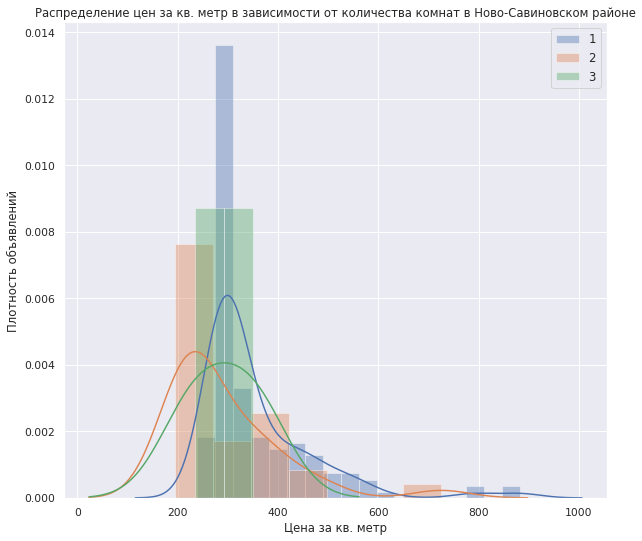

In [35]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(data_novsav.query('How_many_rooms == 1')['Price_per_meters'],  kde=True, label='1');
sns.distplot(data_novsav.query('How_many_rooms == 2')['Price_per_meters'],  kde=True, label='2');
sns.distplot(data_novsav.query('How_many_rooms == 3')['Price_per_meters'],  kde=True, label='3');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат в Ново-Савиновском районе');
plt.ylabel('Плотность объявлений');
plt.xlabel("Цена за кв. метр");

### Распределение цен аренды за кв. метр в зависимости от районов для всех годов постройки

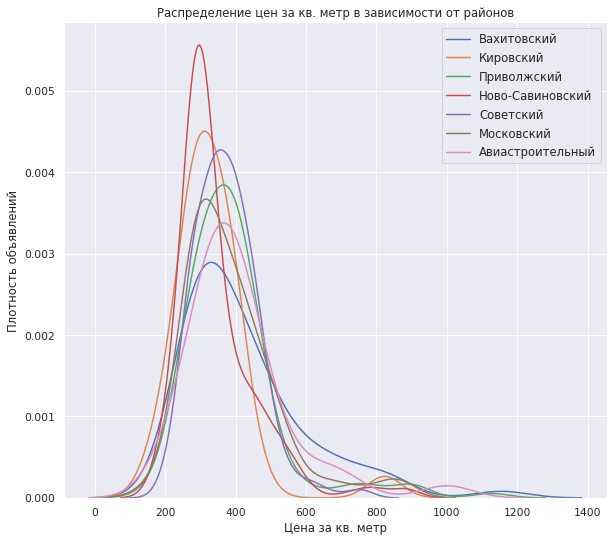

In [36]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.kdeplot(data_vahitov['Price_per_meters'], label='Вахитовский');
sns.kdeplot(data_kirov['Price_per_meters'], label='Кировский');
sns.kdeplot(data_privol['Price_per_meters'], label='Приволжский');
sns.kdeplot(data_novsav['Price_per_meters'], label='Ново-Савиновский');
sns.kdeplot(df.query("District == 'Sovetskij'")['Price_per_meters'], label='Советский');
sns.kdeplot(df.query("District == 'Moskovskij'")['Price_per_meters'], label='Московский');
sns.kdeplot(df.loc[df['District'] == "Aviastroitel'nyj"]['Price_per_meters'], label='Авиастроительный');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от районов');
plt.xlabel("Цена за кв. метр");
plt.ylabel('Плотность объявлений');

### Распределение цен за кв. метр в зависимости от количества комнат в среднем во всех районов

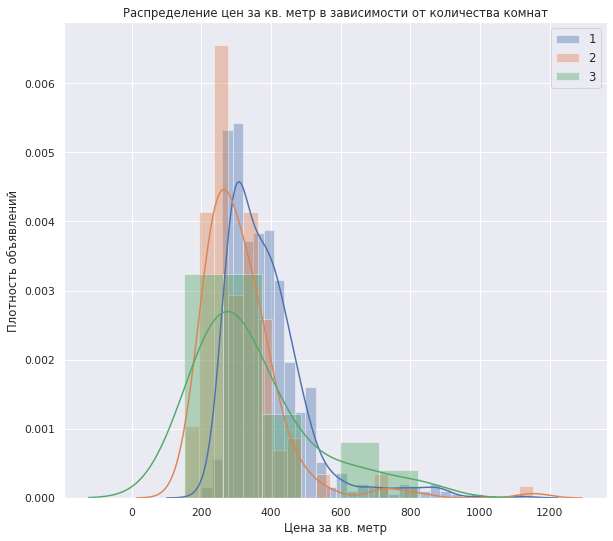

In [37]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k')
sns.distplot(df.loc[df['How_many_rooms'] == 1]['Price_per_meters'],  kde=True, label='1')
sns.distplot(df.loc[df['How_many_rooms'] == 2]['Price_per_meters'],  kde=True, label='2')
sns.distplot(df.loc[df['How_many_rooms'] == 3]['Price_per_meters'],  kde=True, label='3')
# sns.distplot(df.loc[df['How_many_rooms'] == 4]['Price_per_meters'],  kde=True, label='4')

plt.legend(prop={'size': 12})
plt.title('Распределение цен за кв. метр в зависимости от количества комнат')
plt.xlabel("Цена за кв. метр");
plt.ylabel('Плотность объявлений');

### Количество объявлений с определённой этажностью

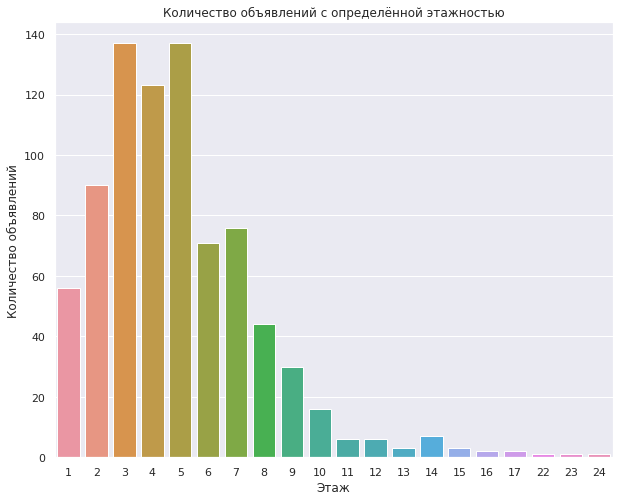

In [38]:
sns.countplot(df['Floor']);
plt.title('Количество объявлений с определённой этажностью')
plt.xlabel("Этаж");
plt.ylabel('Количество объявлений');

### Распределение цен за кв. метр в зависимости от этажности квартиры

Введём новый признак Floor_height, который будет разделять этажность квартиры на три категории.
В качестве границ возьмём 3 и 6 этаж

In [39]:
def level_floor(floor):
    if floor <= 3:
        return 0
    elif floor <= 6:
        return 1
    else:
        return 2

In [40]:
df['Floor_category'] = df['Floor'].apply(level_floor)

In [41]:
df.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters,Floor_category
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000,1
1,Novo-Savinovskij,13,2,12,62,18,-1,62,483.870968,2
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409,2
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455,1
4,Vahitovskij,18,4,9,220,12,-1,220,590.909091,2


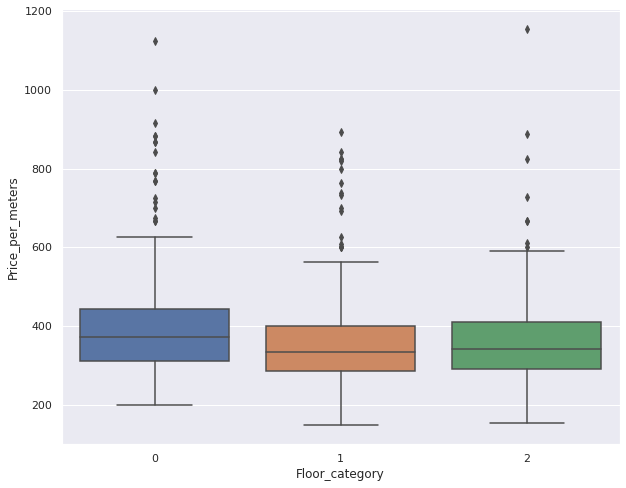

In [42]:
sns.boxplot(x = 'Floor_category', y = 'Price_per_meters', data = df);

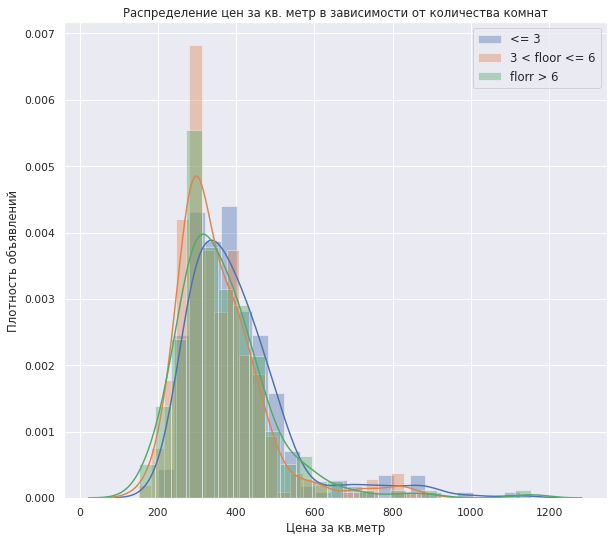

In [43]:
fig=plt.figure(figsize=(10, 9), dpi= 70, facecolor='w', edgecolor='k');
sns.distplot(df.query("Floor_category == 0")['Price_per_meters'],  kde=True, label='<= 3');
sns.distplot(df.query("Floor_category == 1")['Price_per_meters'],  kde=True, label='3 < floor <= 6');
sns.distplot(df.query("Floor_category == 2")['Price_per_meters'],  kde=True, label='florr > 6');

plt.legend(prop={'size': 12});
plt.title('Распределение цен за кв. метр в зависимости от количества комнат');
plt.xlabel('Цена за кв.метр');
plt.ylabel('Плотность объявлений');

## Построение модели

### Преобразуем нечисловые признаки в числовые

In [44]:
data_train = data.query('kitchen_meters != -1')
data_train.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters,Year_category
0,Vahitovskij,15,2,5,75,12,2008,75,400.000000,2
2,Novo-Savinovskij,22,4,9,186,16,2011,186,537.634409,3
3,Vahitovskij,18,3,5,110,9,2006,110,454.545455,2
5,Novo-Savinovskij,15,3,8,100,9,2008,100,350.000000,2
8,Vahitovskij,18,4,3,180,4,2014,180,555.555556,3


In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

enc = LabelEncoder()
data_train['District'] = enc.fit_transform(data_train['District'])

/home/lenarsaitov/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))
/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
data_train.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Living_area,Price_per_meters,Year_category
0,6,15,2,5,75,12,2008,75,400.000000,2
2,3,22,4,9,186,16,2011,186,537.634409,3
3,6,18,3,5,110,9,2006,110,454.545455,2
5,3,15,3,8,100,9,2008,100,350.000000,2
8,6,18,4,3,180,4,2014,180,555.555556,3


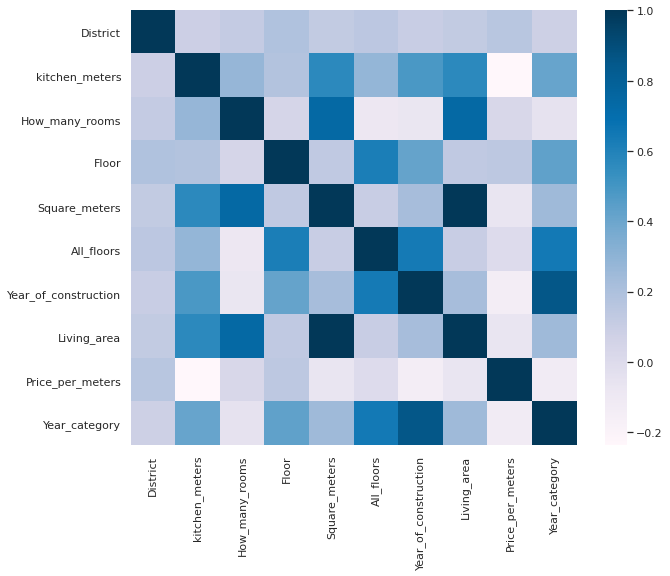

In [47]:
sns.heatmap(data_train.corr(), cmap = "PuBu");

Видно, что есть признаки, который достаточно сильно коррелируют друг с другом
Выбросим их

In [48]:
data_train = data_train.drop(['Year_category', 'Living_area'], axis = 1)

In [49]:
data_train.head()

,District,kitchen_meters,How_many_rooms,Floor,Square_meters,All_floors,Year_of_construction,Price_per_meters
0,6,15,2,5,75,12,2008,400.000000
2,3,22,4,9,186,16,2011,537.634409
3,6,18,3,5,110,9,2006,454.545455
5,3,15,3,8,100,9,2008,350.000000
8,6,18,4,3,180,4,2014,555.555556


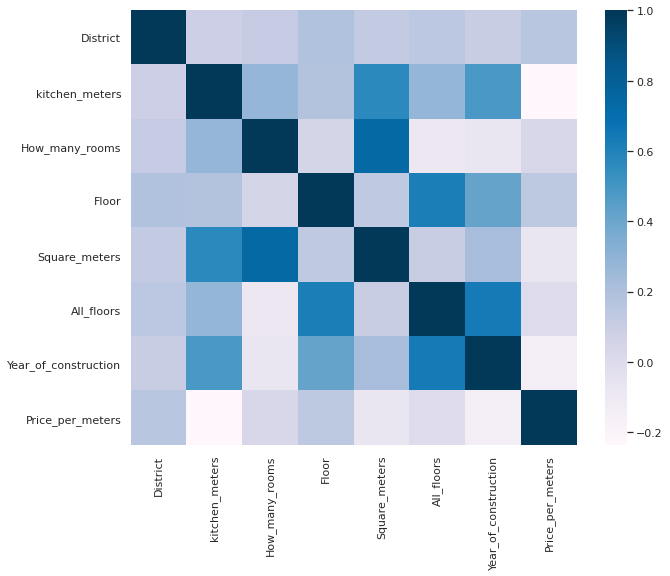

In [50]:
sns.heatmap(data_train.corr(), cmap = "PuBu");

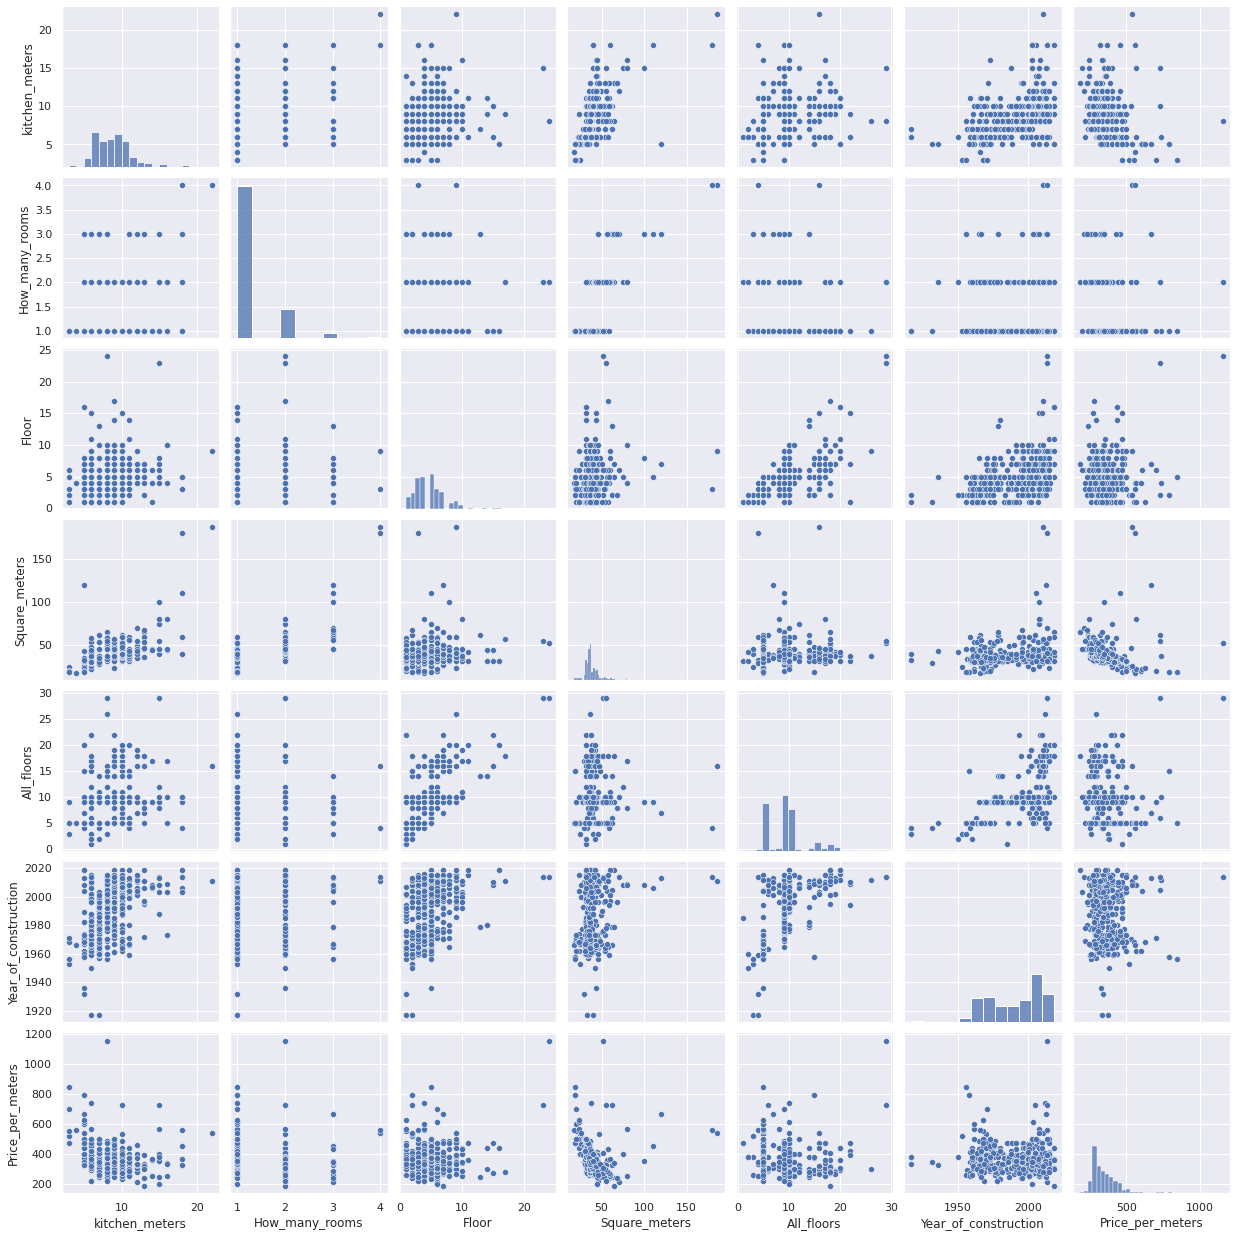

In [51]:
sns.pairplot(data_train.drop(['District', ], axis = 1));

### Применим линейную модель

MSE: 6997.669
RMSE: 83.652
MAE: 61.251


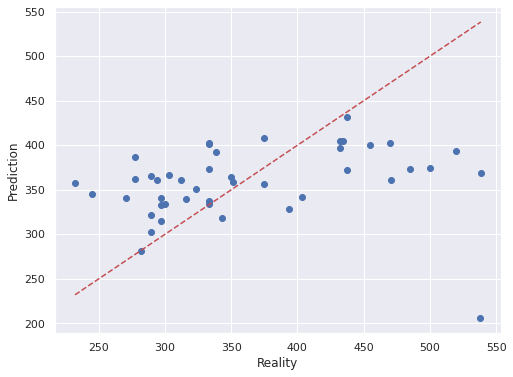

In [52]:
train_data, test_data, train_labels, test_labels = train_test_split(data_train.iloc[:, :-1], data_train.iloc[:, -1], test_size = 0.1, random_state=0)

model = LinearRegression()
model.fit(X=train_data, y=train_labels)

accuracy_report(test_labels, model.predict(test_data))


### Применим алгоритм TSNE для представления структуры данных в виду двухмерного изображения

In [53]:
tsne = TSNE(random_state=0)

In [54]:
%%time
tsne.fit(data_train)

CPU times: user 5.17 s, sys: 84.4 ms, total: 5.25 s
Wall time: 6.78 s


TSNE(random_state=0)

In [55]:
tsne.embedding_.shape

(439, 2)

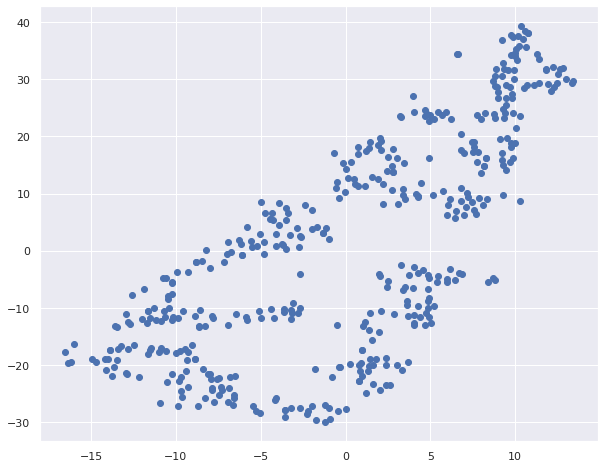

In [56]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1]);